# ANALYSIS OF EUROPEAN-STYLE CALL AND PUT OPTIONS

In this notebook I show how you can analyse Vanilla European Call and Put Equity options

In [1]:
import sys
sys.path.append("..")
sys.path.append("..\\..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.finutils.FinDate import FinDate
from financepy.products.equities.FinOption import FinOptionTypes
from financepy.products.equities.FinVanillaOption import FinVanillaOption
from financepy.products.equities.FinEquityModelTypes import FinEquityModelBlackScholes
from financepy.market.curves.FinFlatCurve import FinFlatCurve

## Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

In [4]:
expiryDate = FinDate(1, 7, 2015)
payoffType = FinOptionTypes.EUROPEAN_CALL
strikePrice = 100.0

We now create the option object

In [5]:
callOption = FinVanillaOption(expiryDate, strikePrice, payoffType)

## Valuation

To do a valuation we need to specify the date and set the market inputs

In [18]:
valueDate = FinDate(1, 1, 2015)
stockPrice = 100
dividendYield = 0.0

For simplicity the discount curve is assumed to be flat here (we can pass in any discount curve) and is created as follows.

In [19]:
interestRate = 0.025
discountCurve = FinFlatCurve(valueDate, interestRate, 1)

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [20]:
volatility = 0.40
model = FinEquityModelBlackScholes(volatility)

The valuation is as follows

In [21]:
value = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print("Option Value: %12.5f" %value)

Option Value:     11.74706


### Spot Price Dependency

We can examine how the option value depends on the spot price

In [22]:
stockPrices = np.linspace(60,140,100)
values = callOption.value(valueDate, stockPrices, discountCurve, dividendYield, model)

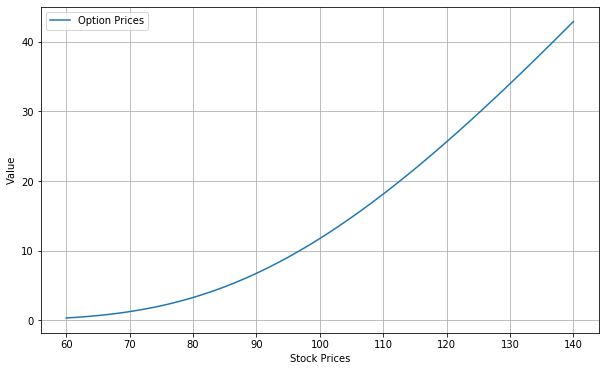

In [23]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices,values, label="Option Prices")
plt.xlabel("Stock Prices")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Volatility Dependency

We can see how the value depends on volatility

In [89]:
volatilities = np.linspace(0.01,10,100)
models = FinEquityModelBlackScholes(volatilities)
values = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, models)

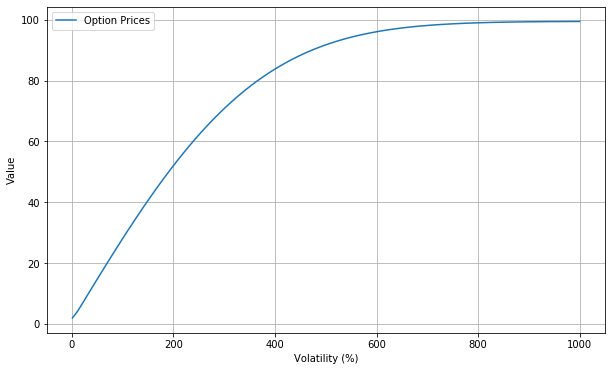

In [13]:
plt.figure(figsize=(10,6))
plt.plot(volatilities*100,values, label="Option Prices")
plt.xlabel("Volatility (%)")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Strike Price Dependency

Also strikes. 

In [14]:
strikePrices = np.linspace(70,130,50)

But as these are part of the option description - so we need to first vectorise those.

In [15]:
callOptions = FinVanillaOption(expiryDate, strikePrices, payoffType)

Look, we have an array of callOptions with different strikes

In [16]:
callOptions._strikePrice

array([ 70.        ,  71.2244898 ,  72.44897959,  73.67346939,
        74.89795918,  76.12244898,  77.34693878,  78.57142857,
        79.79591837,  81.02040816,  82.24489796,  83.46938776,
        84.69387755,  85.91836735,  87.14285714,  88.36734694,
        89.59183673,  90.81632653,  92.04081633,  93.26530612,
        94.48979592,  95.71428571,  96.93877551,  98.16326531,
        99.3877551 , 100.6122449 , 101.83673469, 103.06122449,
       104.28571429, 105.51020408, 106.73469388, 107.95918367,
       109.18367347, 110.40816327, 111.63265306, 112.85714286,
       114.08163265, 115.30612245, 116.53061224, 117.75510204,
       118.97959184, 120.20408163, 121.42857143, 122.65306122,
       123.87755102, 125.10204082, 126.32653061, 127.55102041,
       128.7755102 , 130.        ])

Then we can get back a vector of values

In [17]:
callValues = callOptions.value(valueDate, stockPrice, discountCurve, dividendYield, model)

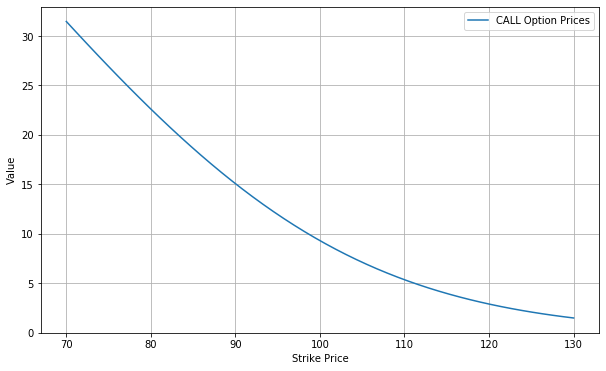

In [18]:
plt.figure(figsize=(10,6))
plt.plot(strikePrices, callValues, label="CALL Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Let's do put options too 

In [19]:
putOptions = FinVanillaOption(expiryDate, strikePrices, FinOptionTypes.EUROPEAN_PUT)

In [20]:
putValues = putOptions.value(valueDate, stockPrice, discountCurve, dividendYield, model)

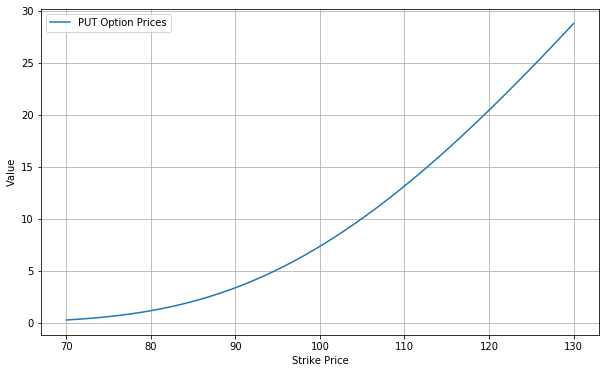

In [21]:
plt.figure(figsize=(10,6))
plt.plot(strikePrices, putValues, label="PUT Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Expiry Time Dependency

You may think that this is complicated as we need a vector of maturity dates. However there is a trick. If you pass a vector of valuation dates into the value date then that is used as the expiry time.

In [22]:
times = np.linspace(0,1,100)

In [23]:
callValues = callOption.value(times, stockPrice, discountCurve, dividendYield, model)

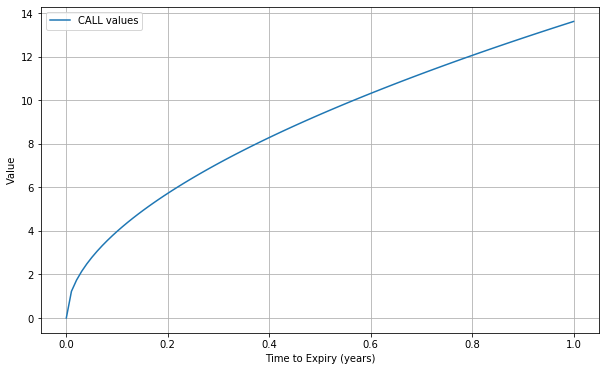

In [24]:
plt.figure(figsize=(10,6))
plt.plot(times, callValues, label="CALL values")
plt.xlabel("Time to Expiry (years)")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Risk Sensitivities

In [24]:
callDeltas = callOption.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

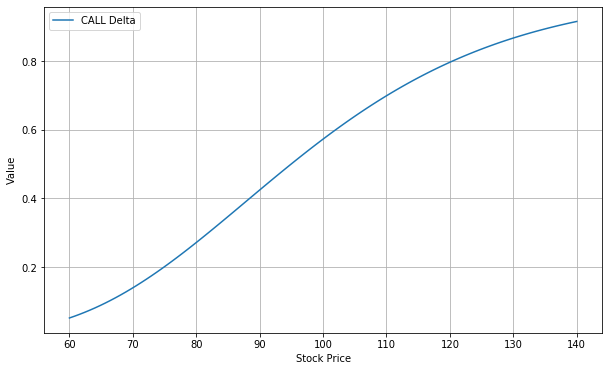

In [25]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callDeltas, label="CALL Delta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [92]:
callGammas = callOption.xgamma(valueDate, stockPrices, discountCurve, dividendYield, model)

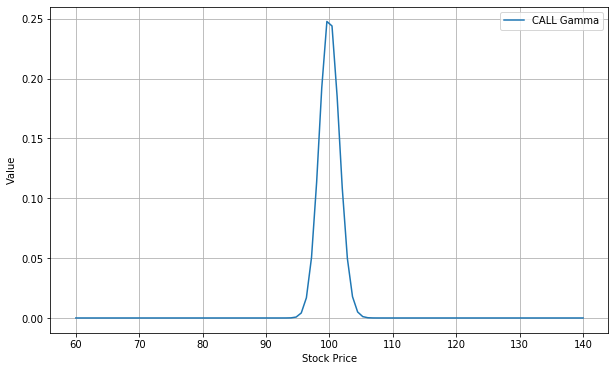

In [93]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callGammas, label="CALL Gamma")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [94]:
callVegas = callOption.vega(valueDate, stockPrices, discountCurve, dividendYield, model)

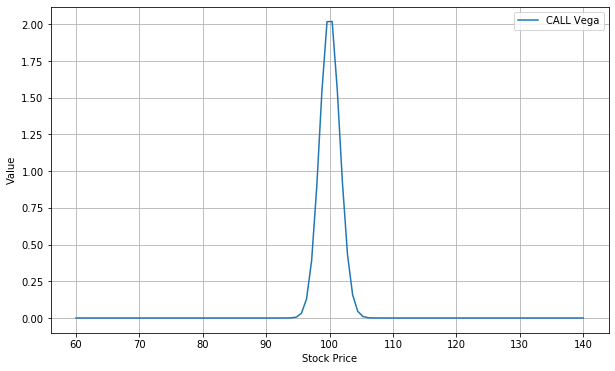

In [95]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callVegas, label="CALL Vega")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [96]:
callThetas = callOption.theta(valueDate, stockPrices, discountCurve, dividendYield, model)

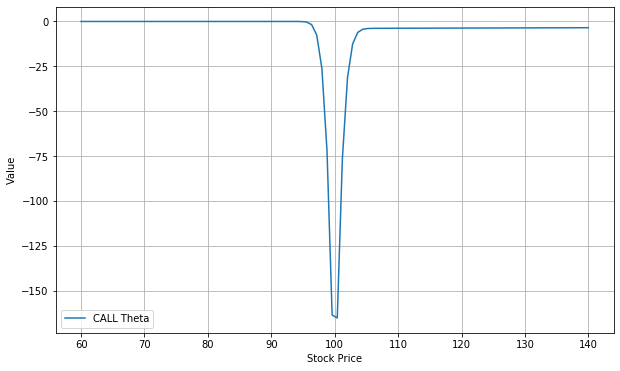

In [97]:
plt.figure(figsize=(10,6))
plt.plot(stockPrices, callThetas, label="CALL Theta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2019, Dominic O'Kane 